# Reading and Munging Data With Pandas

Pandas is the king of data handling libraries. Before getting started with machine learning it's important to be able to get a feature matrix on which to work with. For this pandas is great.

As a quick way to get started, you can load the a california_housing dataset that comes within the sklearn library.

In [1]:
import pandas as pd # It is convention to abreviate pandas as pd
from sklearn.datasets.california_housing import fetch_california_housing

In [2]:
housing_data = fetch_california_housing()

In [3]:
housing_data.DESCR

'California housing dataset.\n\nThe original database is available from StatLib\n\n    http://lib.stat.cmu.edu/\n\nThe data contains 20,640 observations on 9 variables.\n\nThis dataset contains the average house value as target variable\nand the following input variables (features): average income,\nhousing average age, average rooms, average bedrooms, population,\naverage occupation, latitude, and longitude in that order.\n\nReferences\n----------\n\nPace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,\nStatistics and Probability Letters, 33 (1997) 291-297.\n\n'

In [4]:
print(housing_data.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [5]:
housing_data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ..., 
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [6]:
housing_data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
# Building a data frame
df = pd.DataFrame(data = housing_data.data, columns= housing_data.feature_names) # It is common to abreviate data frame to df

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# Adding a new feature

In [9]:
y = housing_data.target
df['SalePrice'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


The dataset above looks fine. But just to showcase some of the thingns pandas can do...

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
SalePrice     20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
df.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
SalePrice      3842
dtype: int64

In [13]:
df['HouseAge'].value_counts().head(3)

52.0    1273
36.0     862
35.0     824
Name: HouseAge, dtype: int64

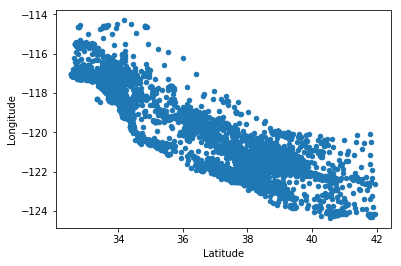

In [14]:
import matplotlib.pyplot as plt # Standard plotting library
df.plot(x = 'Latitude', y = 'Longitude', kind='scatter')
plt.show()

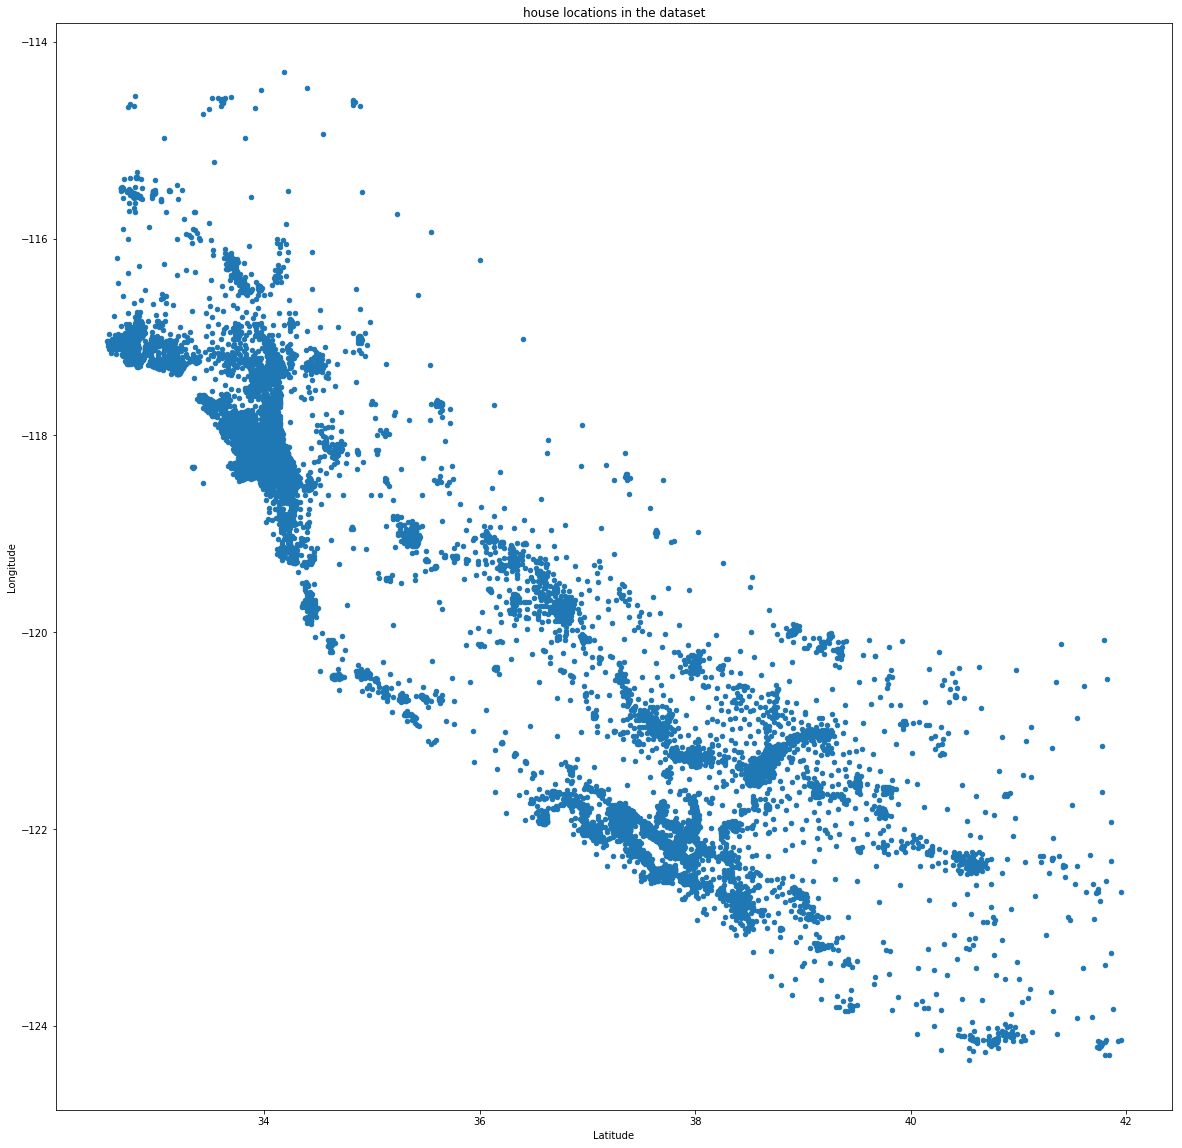

In [15]:
df.plot(x = 'Latitude', y = 'Longitude', kind='scatter', title="house locations in the dataset", figsize=(20,20))
plt.show()

In [16]:
# At this point I've forgotten what data I have
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


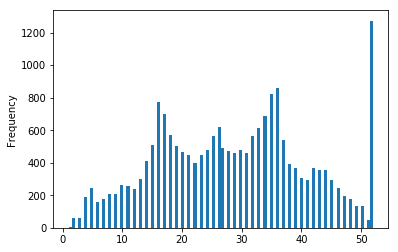

In [17]:
df['HouseAge'].plot(kind= 'hist', bins = 100)
plt.show()

The plot above is not particulary interseting, though it does show some bursts of sales of houses of 15 and 35 years old. Probably there was a construction boom of some sort in those years.

# The awesome .apply and .applymap methods
Two great ways to manipulate data

From looking at the plot above, I suspect the survey that gatherd this data asked something such as "50+ years old"
I might want my model to treat this houses in a speciall way, since (for example) a linear model might really contort itself to find a meaning to houses that are 50years old that fits both 51 year old houses, and also 200 year old houses.

In [18]:
df['MoreThan_50_YearsOld'] = df['HouseAge'].apply(lambda x: 1 if x == 50 else 0)

As a quick asside, I wanted to find a sample of the dataframe that showed this effect. So I wrote a little loop

I'd usually deleate it - but it shows how python is really easy to use for these quick questions.

In [19]:
for i in range(2000):
    houses_over_50 = df.sample(10, random_state=i).iloc[:,-1].sum()
    if houses_over_50 > 1:
        print(houses_over_50, i)

2 534
2 732
2 1733


In [20]:
df.sample(10, random_state=534)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice,MoreThan_50_YearsOld
197,2.5900,52.0,4.389961,1.162162,866.0,3.343629,37.77,-122.22,0.96400,0
7565,2.0357,32.0,4.510638,1.164894,1639.0,4.359043,33.89,-118.19,1.07300,0
16676,3.0938,34.0,5.719557,1.138376,1155.0,2.130996,35.14,-120.68,2.45900,0
17111,15.0001,40.0,9.802326,1.135659,831.0,3.220930,37.46,-122.18,5.00001,0
8369,2.3882,47.0,4.364086,1.126853,2374.0,3.911038,33.98,-118.34,1.37700,0
17365,2.3506,50.0,4.878412,1.024814,985.0,2.444169,34.95,-120.43,1.36100,1
12506,2.5417,50.0,5.964981,1.120623,532.0,2.070039,38.56,-121.43,1.25900,1
3718,3.9792,42.0,5.263514,0.979730,450.0,3.040541,34.19,-118.41,1.93800,0
16372,4.0227,10.0,6.346847,1.117117,782.0,3.522523,38.03,-121.30,1.07700,0
20457,4.5458,6.0,5.154015,1.061606,2180.0,2.398240,34.28,-118.77,2.08200,0


## Applymap
I can't thing of a good reason to use applymap, so I'll do something silly. Applymap applies the funnction you pass it to every cell in your table, here I'll just grab the first digit of every number - for no reason.

In [21]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice,MoreThan_50_YearsOld
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0


In [22]:
df.applymap(lambda x: int(str(abs(x))[0])).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice,MoreThan_50_YearsOld
0,8,4,6,1,3,2,3,1,4,0
1,8,2,6,0,2,2,3,1,3,0
2,7,5,8,1,4,2,3,1,3,0
3,5,5,5,1,5,2,3,1,3,0
4,3,5,6,1,5,2,3,1,3,0


You can also write more complicated functions. Here I just use the same example.

In [23]:
def get_first_digit(x):
    num = abs(x)
    text_representation_of_num = str(num)
    first_symbol_in_text_representation_of_num = text_representation_of_num[0]
    numeric_interpretation_of_symbol = int(first_symbol_in_text_representation_of_num)
    return numeric_interpretation_of_symbol

In [24]:
# Example:
get_first_digit(27.5)

2

In [25]:
df.applymap(get_first_digit).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice,MoreThan_50_YearsOld
0,8,4,6,1,3,2,3,1,4,0
1,8,2,6,0,2,2,3,1,3,0
2,7,5,8,1,4,2,3,1,3,0
3,5,5,5,1,5,2,3,1,3,0
4,3,5,6,1,5,2,3,1,3,0


In [26]:
# this is the same as writing:
df.applymap(lambda x: get_first_digit(x)).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice,MoreThan_50_YearsOld
0,8,4,6,1,3,2,3,1,4,0
1,8,2,6,0,2,2,3,1,3,0
2,7,5,8,1,4,2,3,1,3,0
3,5,5,5,1,5,2,3,1,3,0
4,3,5,6,1,5,2,3,1,3,0


# Practice:
Here I've loaded a dataset related to cars from https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

In [27]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')

In [28]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [29]:
# It has no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
vhigh      1727 non-null object
vhigh.1    1727 non-null object
2          1727 non-null object
2.1        1727 non-null object
small      1727 non-null object
low        1727 non-null object
unacc      1727 non-null object
dtypes: object(7)
memory usage: 94.5+ KB


Try to get it to a purely numeric table (it can have more columns, but not more rows)

Above all, google is your friend :)